<a href="https://colab.research.google.com/github/YH1004/2023-NTU-ML-CAMP/blob/main/codes_for_student/Pandas_practice_ipynb_%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas Practice
2023/1/30  
Meng-Chieh, Liu

## Introduction



Pandas is a Python library for data manipulation and analysis, it provides easy-to-use data structures and data analysis tools for handling and processing structured data. Learning Pandas can help you to efficiently manipulate, transform, and analyze data in various formats, making it an essential tool for data scientists, analysts, and anyone working with data.

In this section, we will use a transaction data of a fictitious wine distributor based out of New York, which is generated by https://mplholt.shinyapps.io/GADGET/, to practice using Python Pandas library to:

1. Find top-selling products in December
2. Draw sales change rate by categories


## Settings

In [1]:
# download transaction data
!gdown --no-check-certificate --folder https://drive.google.com/drive/folders/1axX2kD1K48-q2X6BjoS9ZtzQykYyzOXo?fbclid=IwAR1K8xUPX6rtBn3guYOdllegj6cnIumZRoMj1fujJIkJdBfsIUNZgdc9V_U

Retrieving folder list
Processing file 16eTog30h1iFkPjvBV3PeZuLfxTjs68qd Cash_Receipts.csv
Processing file 1PtP8Q1UWWhZrZoY8WGoERViSUJHhGSRw Customers.csv
Processing file 1X0GMXlVRbtuO1a3Okd9IWtQfXU3W0WYD Employees.csv
Processing file 1avd5VdbYfDPlyRhMvC9eZWbwcpN-wo4s Inventory.csv
Processing file 19ZPzifkhYcTy6m-jb6KN6ZzEjLRHYlhl Invoice_Detail.csv
Processing file 1-VcBRsSrRzJ9jYlrfFLlx_yC4KpvO0vD Invoice_Summary.csv
Processing file 1JJ94M0jvUhKKeiXLajcIxDtcO9jCI8xg Sales_Order_Detail.csv
Processing file 1yGr8itlBcUO1kd_wLew5dfH4uFi8BE-X Sales_Order_Summary.csv
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=16eTog30h1iFkPjvBV3PeZuLfxTjs68qd
To: /content/data/Cash_Receipts.csv
100% 41.9k/41.9k [00:00<00:00, 46.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PtP8Q1UWWhZrZoY8WGoERViSUJHhGSRw
To: /content/data/Customers.csv
100% 346k/346k [00:00<00:00, 89.1MB/s]
Downloadin

In [2]:
data_dir = 'data'

## Read csv into pandas DataFrame

In [3]:
import pandas as pd

In [4]:
def read_as_df(file_name):
  path = f'{data_dir}/{file_name}.csv'
  return pd.read_csv(path, encoding='cp1252')

In [5]:
Cash_Receipts = read_as_df('Cash_Receipts')
Customers = read_as_df('Customers')
Employees = read_as_df('Employees')
Inventory = read_as_df('Inventory')
Invoice_Detail = read_as_df('Invoice_Detail')
Invoice_Summary = read_as_df('Invoice_Summary')
Sales_Order_Detail = read_as_df('Sales_Order_Detail')
Sales_Order_Summary = read_as_df('Sales_Order_Summary')

## 1. Find top-selling products in December

Files to be used: Sales_Order_Detail, Sales_Order_Summary, Inventory

### Observations

Use shape to see the size of DataFrame

In [6]:
Sales_Order_Detail.shape, Sales_Order_Summary.shape, Inventory.shape

((4489, 4), (1000, 4), (744, 4))

Use head function to see first few rows of DataFrame

In [7]:
Sales_Order_Detail.head(3)

,SO_Num,Brand_ID,Quantity_Ordered,Price
0,1001,W-1287,10,24.49
1,1001,W-1313,10,25.99
2,1001,W-1568,30,67.99


In [8]:
Sales_Order_Summary.head(3)

,SO_Num,SO_Date,Emp_ID,Cust_Num
0,1001,2019-01-02,17,MA-1031
1,1002,2019-01-03,11,FL-1103
2,1003,2019-01-03,11,NY-1167


In [9]:
Inventory.head(3)

,Brand_ID,Brand_Name,Category,Price
0,R-1111,Blue Carriage Vintners,Red,167.99
1,R-1112,Thirsty Writer Vintners,Red,111.49
2,R-1113,Abnormally Normal Wine,Red,21.99


Use isna() to see whether N/A exist, for example:

In [10]:
Sales_Order_Detail.isna().sum()

SO_Num              0
Brand_ID            0
Quantity_Ordered    0
Price               0
dtype: int64

Use describe() to have an overview of data, for example:

In [11]:
Sales_Order_Detail.describe()

,SO_Num,Quantity_Ordered,Price
count,4489.000000,4489.000000,4489.000000
mean,1497.445979,15.480953,26.246182
std,288.937219,8.619670,28.539024
min,1001.000000,1.000000,7.990000
25%,1245.000000,8.000000,12.490000
50%,1497.000000,16.000000,17.990000
75%,1749.000000,21.000000,22.990000
max,2000.000000,33.000000,176.990000


### Merge

To merge two different DataFrame we can use merge function, for example:  

In [12]:
Sales = pd.merge(Sales_Order_Detail, Sales_Order_Summary, left_on='SO_Num', right_on='SO_Num', how='outer')
Sales.head()

,SO_Num,Brand_ID,Quantity_Ordered,Price,SO_Date,Emp_ID,Cust_Num
0,1001,W-1287,10,24.49,2019-01-02,17,MA-1031
1,1001,W-1313,10,25.99,2019-01-02,17,MA-1031
2,1001,W-1568,30,67.99,2019-01-02,17,MA-1031
3,1001,W-1581,20,36.99,2019-01-02,17,MA-1031
4,1002,R-1120,18,13.99,2019-01-03,11,FL-1103


In [13]:
Sales.isna().sum()

SO_Num              0
Brand_ID            0
Quantity_Ordered    0
Price               0
SO_Date             0
Emp_ID              0
Cust_Num            0
dtype: int64

* The parameters left_on and right_on are the “key” columns we used for
merging, and the parameter how is the method we choose.

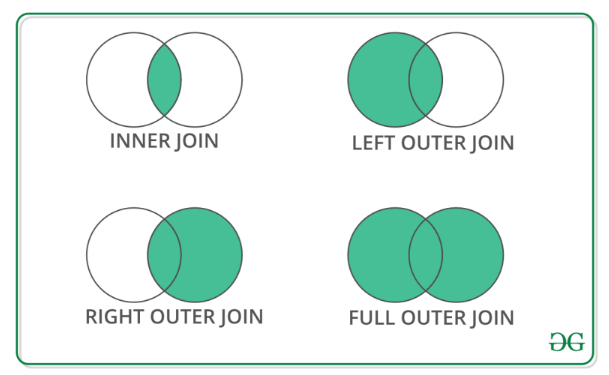

Image Source: https://www.geeksforgeeks.org/python-pandas-merging-joining-and-concatenating/

### Columns calculating

We can directly calculate with columns just like we calculate variables.

In [39]:
Sales['total_price'] = Sales['Quantity_Ordered'] * Sales['Price']
Sales.head(2)

,SO_Num,Brand_ID,Quantity_Ordered,Price,SO_Date,Category,Sales,Month,total_price
0,1001,W-1287,10,24.49,2019-01-02,White,244.90,1,244.90
1,1237,W-1287,7,24.49,2019-03-28,White,171.43,3,171.43


We can get attributes of column.

In [15]:
print(f"Max price: {Sales['total_price'].max()}")
print(f"Mean price: {Sales['total_price'].mean()}")
print(f"Median price: {Sales['total_price'].quantile(0.5)}")
print(f"Min price: {Sales['total_price'].min()}")
print(f"Stabdard Deviation: {Sales['total_price'].std()}")

Max price: 5774.67
Mean price: 407.33472042771217
Median price: 251.88
Min price: 7.99
Stabdard Deviation: 553.2534743121588


To get certain cell value from a pandas DataFrame, we can use df[columns][index], for example:

In [16]:
Sales['SO_Date'][0]

'2019-01-02'

In [17]:
type(Sales['SO_Date'][0])

str

#### Little Prcatice
Assume that it cost $2 for every Quantity_Ordered, calculating the profit for every row.

In [43]:
Sales['profit'] = Sales['total_price'] - 2 * Sales['Quantity_Ordered']
Sales.head()

,SO_Num,Brand_ID,Quantity_Ordered,Price,SO_Date,Category,Sales,Month,total_price,profit
0,1001,W-1287,10,24.49,2019-01-02,White,244.90,1,244.90,224.90
1,1237,W-1287,7,24.49,2019-03-28,White,171.43,3,171.43,157.43
2,1330,W-1287,8,24.49,2019-05-01,White,195.92,5,195.92,179.92
3,1382,W-1287,6,24.49,2019-05-17,White,146.94,5,146.94,134.94
4,1404,W-1287,14,24.49,2019-05-28,White,342.86,5,342.86,314.86


### Map

To do operations on certain columns, we can use map function, for example:

In [18]:
def get_month(Date):
  year, month, date = Date.split('-')
  return int(month)

In [19]:
Sales['month'] = Sales['SO_Date'].map(get_month)
Sales.head(2)

,SO_Num,Brand_ID,Quantity_Ordered,Price,SO_Date,Emp_ID,Cust_Num,total_price,month
0,1001,W-1287,10,24.49,2019-01-02,17,MA-1031,244.9,1
1,1001,W-1313,10,25.99,2019-01-02,17,MA-1031,259.9,1


#### Little Prcatice
Please use map to get the number part of Brand_ID called "numBrand"

### Filtering

To filter pandas DataFrame according to some critera, we can use column of boolean, for example:

In [20]:
Sales['month'] == 12

0       False
1       False
2       False
3       False
4       False
        ...  
4484     True
4485     True
4486     True
4487     True
4488     True
Name: month, Length: 4489, dtype: bool

In [21]:
critera = (Sales['month'] == 12)

In [22]:
December_Sales = Sales[critera].reset_index(drop=True)

In [23]:
December_Sales.head(2)

,SO_Num,Brand_ID,Quantity_Ordered,Price,SO_Date,Emp_ID,Cust_Num,total_price,month
0,1902,W-1115,24,70.99,2019-12-02,13,MI-1058,1703.76,12
1,1902,W-1240,8,18.49,2019-12-02,13,MI-1058,147.92,12


#### Little Practice
Please filter Salse data from August, with Price above 30. 

### Groupby

We can group the DataFrame according to values of columns using groupby function, for example:

In [24]:
grouped_December_Sales = December_Sales.groupby(by=['Brand_ID']).sum()[["Quantity_Ordered", "total_price"]]
grouped_December_Sales.head(10)

,Quantity_Ordered,total_price
Brand_ID,,
R-1111,18,3023.82
R-1115,25,224.75
R-1121,6,431.94
R-1122,9,188.91
R-1123,21,398.79
R-1125,7,73.43
R-1127,1,14.99
R-1129,30,944.70
R-1134,27,2051.73


In [25]:
grouped_December_Sales.columns = ['December_Quantity', 'December_Sales']

#### Little Prcatice
Please get the mean Quantity_Ordered for all Brand_ID in differnet month

### Result

In [26]:
temp = pd.merge(Inventory, grouped_December_Sales, left_on='Brand_ID', right_index=True)
top_selling_December = temp.sort_values('December_Sales', ascending=False).reset_index(drop=True).head(10)
top_selling_December

,Brand_ID,Brand_Name,Category,Price,December_Quantity,December_Sales
0,R-1245,Assorted Errors Wine,Red,174.99,66,11549.34
1,R-1327,Feigned Ignorance Vineyards,Red,139.49,40,5579.60
2,W-1437,Shivering Branch Vintners,White,143.99,33,4751.67
3,R-1152,Knowledgeable Sky,Red,163.99,27,4427.73
4,W-1203,Forgetful Elephant,White,151.49,26,3938.74
5,W-1484,Joyous Friends Wines,White,151.99,24,3647.76
6,W-1511,Tenuous Connection,White,109.99,33,3629.67
7,R-1111,Blue Carriage Vintners,Red,167.99,18,3023.82
8,W-1114,Standing Zebra Winery,White,107.99,27,2915.73
9,R-1178,Gigantic Gyroscope,Red,160.49,18,2888.82


In [27]:
top_selling_December.to_csv('top_selling_December.csv')
top_selling_December.to_excel('top_selling_December.xlsx')

## 2. Sales change rate by categories

Files to be used: Sales_Order_Summary, Sales_Order_Detail, Inventory

### Merge

In [28]:
Sales = pd.merge(Sales_Order_Detail, 
    Sales_Order_Summary[['SO_Num', 'SO_Date']], left_on='SO_Num', right_on='SO_Num')
Sales = pd.merge(Sales, 
    Inventory[['Brand_ID', 'Category']], left_on='Brand_ID', right_on='Brand_ID')

### Calculating and Mapping

In [29]:
Sales['Sales'] = Sales['Quantity_Ordered']*Sales['Price']
Sales['Month'] = Sales['SO_Date'].map(lambda x: int(x.split('-')[1]))
Sales.head(2)

,SO_Num,Brand_ID,Quantity_Ordered,Price,SO_Date,Category,Sales,Month
0,1001,W-1287,10,24.49,2019-01-02,White,244.90,1
1,1237,W-1287,7,24.49,2019-03-28,White,171.43,3


### Pivot Table

We can use pivot_table to get arranged value according to multiple criteria and method. (Just Like pivot table in EXCEL)

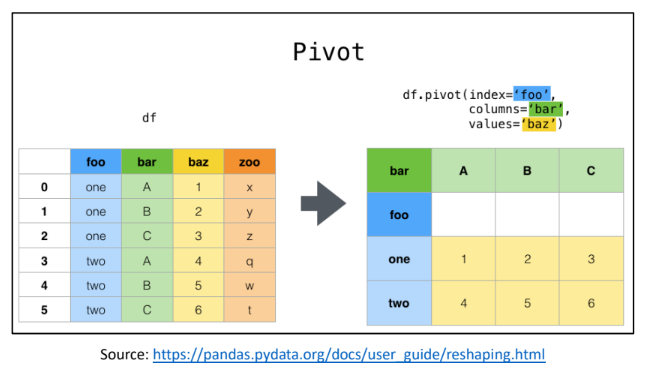

In [30]:
import numpy as np
cat_Sales = Sales.pivot_table(values='Sales', index='Month',
      columns='Category', aggfunc=np.sum)
cat_Sales.head(2)

Category,Red,White
Month,,
1,57374.89,105268.89
2,43606.16,98854.14


### Shifting

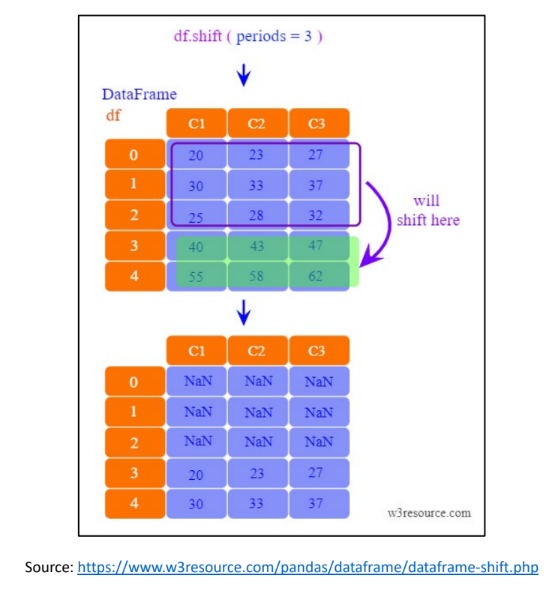

In [31]:
cat_Sales['Change_Red'] = (cat_Sales['Red']-cat_Sales['Red'].shift(1))/cat_Sales['Red']
cat_Sales['Change_White'] = (cat_Sales['White']-cat_Sales['White'].shift(1))/cat_Sales['White']

In [32]:
cat_Sales

Category,Red,White,Change_Red,Change_White
Month,,,,
1,57374.89,105268.89,NaN,NaN
2,43606.16,98854.14,-0.315752,-0.064891
3,41084.28,104328.13,-0.061383,0.052469
4,52122.17,98499.69,0.211770,-0.059172
5,50261.60,94654.58,-0.037018,-0.040623
6,54834.47,105045.39,0.083394,0.098917
7,43695.12,116984.73,-0.254934,0.102059
8,45105.24,90735.15,0.031263,-0.289299
9,41978.00,111656.70,-0.074497,0.187374


### Matplotlib

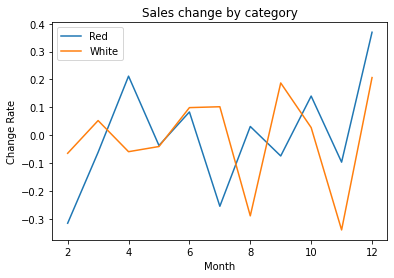

In [33]:
import matplotlib.pyplot as plt

plt.title('Sales change by category')
plt.plot(cat_Sales['Change_Red'], label='Red')
plt.plot(cat_Sales['Change_White'], label='White')
plt.xlabel('Month')
plt.ylabel('Change Rate')
plt.legend()
plt.show()

## Task: Investigate in unpaid invoices

Files to be used: Invoice_Summary, Cash_Receipts, Sales_Order_Summary

### Have a look

In [34]:
Invoice_Summary.head(3)

,Invoice_Num,Delivery_Date,Invoice_Date,SO_Num,Sales_Total,Freight_Charge
0,I-1001,2019-01-04,2019-01-05,1001,3284.30,164.22
1,I-1002,2019-01-04,2019-01-05,1005,6838.70,273.55
2,I-1003,2019-01-07,2019-01-08,1002,2946.15,88.38


In [35]:
Cash_Receipts.head(3)

,Remit_Nums,Receipt_Date,Invoice_Num,Discount,Receipt_Amt,Account_Num
0,R-1001,2019-01-14,I-1001,65.69,3382.83,1
1,R-1002,2019-01-19,I-1009,3.34,170.23,3
2,R-1003,2019-01-22,I-1005,0.00,2421.63,3


In [36]:
Sales_Order_Summary.head(3)

,SO_Num,SO_Date,Emp_ID,Cust_Num
0,1001,2019-01-02,17,MA-1031
1,1002,2019-01-03,11,FL-1103
2,1003,2019-01-03,11,NY-1167


### Merge


* We want to build connect between “Unpaid Invoices” and “Customer”. By
merge Invoice_Summary and Cash_Receipts, we can get the paid information
for each invoice.  
* By merge previous result and Sales_Order_Summary, we can get the customer
information for each invoice.

### Filter

* Just filter out invoices with missing value (N/A) then we get the result.

### Investigate

* As a student majoring in accounting, we just can’t help but be suspicious about
these transactions. Are there fraud transactions? Let’s find out!
* First, let’s investigate in the customers. (Hint: Use groupby)

* Second, let’s investigate in the employees. (Hint: Use groupby)

* Employee 19 seems to be included in a little bit more unpaid invoice. Let’s have
a look at all unpaid invoices included by him/she. (Hint: Use filtering)

*　Let’s find out who is him/she. (Hint: Use filtering on Employees)